In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import pygwalker as pyg

**Importing the dataset**

In [3]:
df = pd.read_csv("Social_Network_Ads.csv")

In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


## we have already checked samething on before tasks of same data set there is no duplicates no nan values

In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [10]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [11]:
drop_id_df=df.drop(["User ID"],axis=1)
drop_id_df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

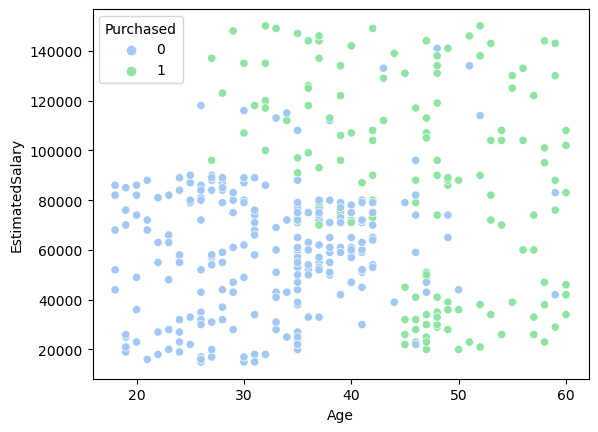

In [12]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"],palette = "pastel6")

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

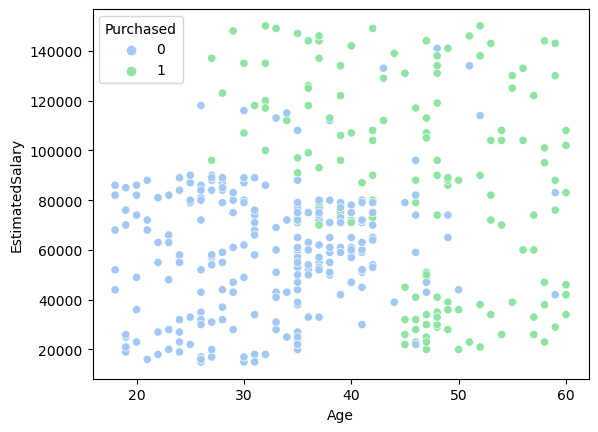

In [13]:
sns.scatterplot(x=drop_id_df["Age"],y=drop_id_df["EstimatedSalary"],hue=drop_id_df["Purchased"],palette = "pastel6")

**Splitting the dataset into the Training set and Test set**

In [14]:
from sklearn.model_selection import train_test_split        

X = drop_id_df.loc[:,["Age","EstimatedSalary"]].values
y = drop_id_df.loc[:,"Purchased"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 73)

In [15]:
X_train

array([[    45,  22000],
       [    37, 144000],
       [    30,  80000],
       [    42,  80000],
       [    43, 112000],
       [    48,  74000],
       [    31,  18000],
       [    50,  88000],
       [    58, 144000],
       [    48,  29000],
       [    35,  50000],
       [    57,  60000],
       [    41,  30000],
       [    30,  62000],
       [    46,  88000],
       [    28,  79000],
       [    47,  34000],
       [    34, 115000],
       [    54,  26000],
       [    24,  84000],
       [    25,  22000],
       [    31,  58000],
       [    59, 143000],
       [    43, 133000],
       [    46,  28000],
       [    60, 102000],
       [    41,  72000],
       [    37,  77000],
       [    26,  17000],
       [    40,  59000],
       [    49,  28000],
       [    47,  49000],
       [    42,  80000],
       [    41,  72000],
       [    39,  42000],
       [    26,  30000],
       [    37,  93000],
       [    26,  43000],
       [    23,  48000],
       [    37,  75000],


<AxesSubplot:>

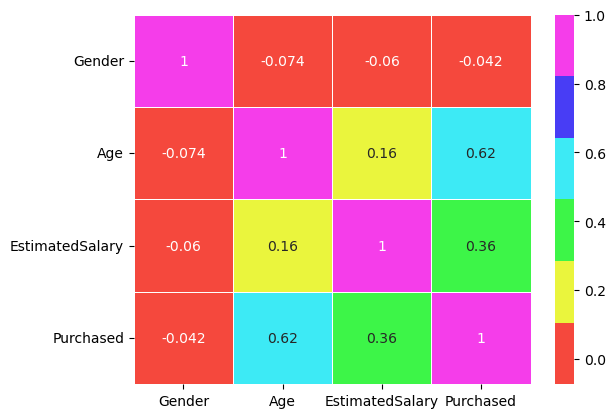

In [18]:
sns.heatmap(drop_id_df.corr(), annot=True, linewidth=.5,cmap=sns.hls_palette(s=0.9))

**Feature Scaling**

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

**Fitting K-NN to the Training set**

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=7)

max val of 7

In [22]:
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation


for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_train,y_train) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_train,y_train) , " cv score : ", 
        np.mean(cross_val_score(knn, X_train, y_train, cv=10, scoring = "roc_auc"))) #predicting using the model

K value  :  1  train score :  0.9964285714285714  cv score :  0.8057602339181287
K value  :  2  train score :  0.9142857142857143  cv score :  0.8910087719298246
K value  :  3  train score :  0.925  cv score :  0.9078508771929824
K value  :  4  train score :  0.9107142857142857  cv score :  0.9162134502923976
K value  :  5  train score :  0.925  cv score :  0.9234795321637426
K value  :  6  train score :  0.9178571428571428  cv score :  0.927953216374269
K value  :  7  train score :  0.9178571428571428  cv score :  0.9307017543859649
K value  :  8  train score :  0.9035714285714286  cv score :  0.9284502923976609
K value  :  9  train score :  0.9071428571428571  cv score :  0.9299415204678363
K value  :  10  train score :  0.9107142857142857  cv score :  0.9288157894736842
K value  :  20  train score :  0.9035714285714286  cv score :  0.946622807017544
K value  :  50  train score :  0.8785714285714286  cv score :  0.9467251461988304


**Predicting the Test set results**

In [39]:
knn.score(X_test,y_test)

0.8916666666666667

**Making the Confusion Matrix**

In [34]:
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[70,  3],
       [10, 37]], dtype=int64)

In [38]:
#also do the auroc and acc

C:\Users\seeyo\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8916666666666667

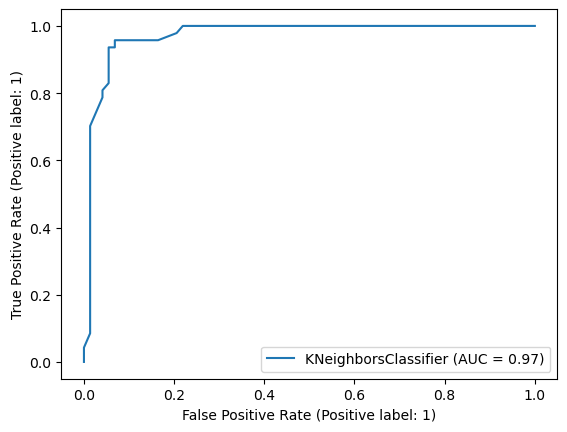

In [37]:
f1_score(y_test,y_pred) # f1 score
# logistic_regression.score(X_test,y_test)
plot_roc_curve(knn, X_test, y_test) #AUROC
accuracy_score(y_test,y_pred) #accuracy

In [39]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,70,3,73
1,10,37,47
All,80,40,120
